In [19]:
#수집 --> df --> csv저장

from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys 
import time
import pandas as pd
import random
import re

#기간(2023.01.01 ~)부터인것만 수집
browser = webdriver.Chrome()
url = 'https://www.youtube.com/@SamsungKorea/videos'
browser.get(url)

results = []
for i in range(10):
    # 화면 빈 곳을 선택
    body = browser.find_elements('css selector', 'body')[0]
    # Page Down 버튼을 입력..
    body.send_keys(Keys.PAGE_DOWN)
    body.send_keys(Keys.PAGE_DOWN)
    body.send_keys(Keys.PAGE_DOWN)
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(random.uniform(2, 4))

    html = browser.page_source 
    soup = BeautifulSoup(html, 'html.parser')
    video_list = soup.select('ytd-rich-grid-media.style-scope.ytd-rich-item-renderer')

    for video in video_list:
        title_elements = video.select('#video-title')[0].text
        title = re.findall(r'\](.*?)\|',title_elements)

        view = video.select('div#metadata-line > span')[0].text
        numbers = re.findall(r'\d+', view)
        view_number = int(numbers[0])

        original_date = video.select('div#metadata-line > span')[1].text
        date = original_date
        # '일 전', '개월 전', '년 전'에 따라 다르게 처리
        if '시간 전' in date:
            date = 1 
        elif '일 전' in date:
            date = int(date.replace('일 전', ''))
        elif '주 전' in date:
            date = int(date.replace('주 전', '')) * 3
        elif '개월 전' in date:
            date = int(date.replace('개월 전', '')) * 30
        elif '년 전' in date:
            date = int(date.replace('년 전', '')) * 365
        else:
            try:
                date = int(date)
            except ValueError:
                print(f"{date}를 숫자로 변환할 수 없습니다.")
                continue
                
         # 날짜가 330 이하인 경우만 수집
        if date <= 330 and '갤럭시' in title: 
    #          print(title, '|', original_date, '|', view_number,'|',full_link)
            data = [title, original_date, view]
            results.append(data)

df = pd.DataFrame(results)
df.columns = ['title','original_date','view']
df

ValueError: Length mismatch: Expected axis has 0 elements, new values have 3 elements

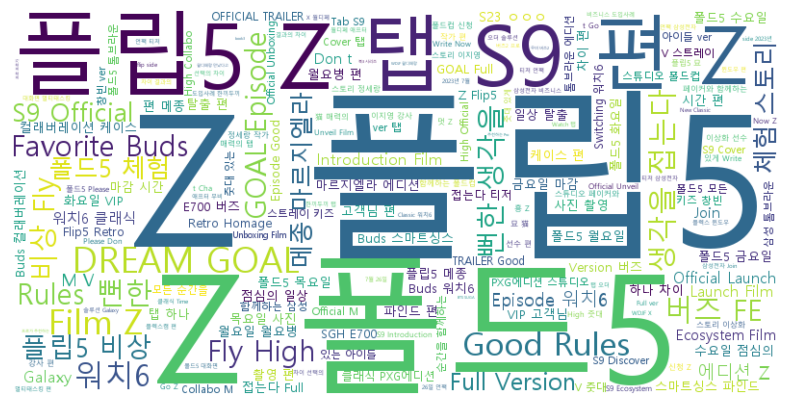

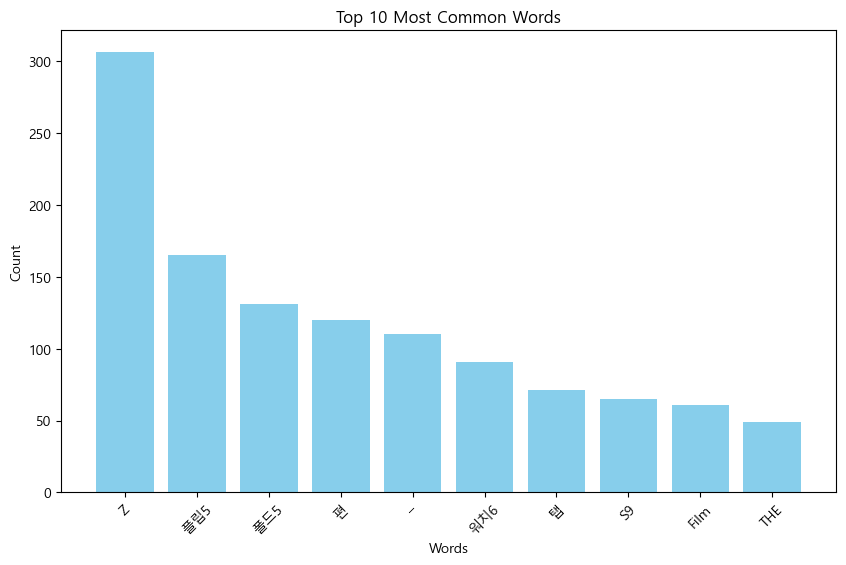

   word  count
0     Z    306
1   플립5    165
2   폴드5    131
3     편    120
4     –    110
5   워치6     91
6     탭     71
7    S9     65
8  Film     61
9   THE     49


In [17]:
#제목 키워드를 찾기
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from collections import Counter
from matplotlib import font_manager, rc

raw = pd.read_csv('./삼성전자갤럭시 광고 정보.csv')
reviews = raw['title'].dropna()
text = ' '.join(reviews)

# NLTK를 사용하여 토큰화
tokens = word_tokenize(text)

# 불용어리스트 지정
stop_words = set(['가','게','고','과','네','는','다','도','들','듯','를','에','와','으로',
'은','을','의','이','인','임','자','잘','좀','지','하다','한', '.', ',', '?', '!', '(', ')','...','..','[',']',
'|','삼성전자','갤럭시','Z','플립','폴더','-',])

# 불용어 제거
tokens = [word for word in tokens if word.lower() not in stop_words]

# 워드클라우드 생성 및 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 사용하고자 하는 한글 폰트의 경로를 지정
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(' '.join(tokens))

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 단어 빈도수 분석 및 한글 폰트 설정
word_counter = Counter(tokens)
most_common_words = word_counter.most_common(10)

font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

df_word_count = pd.DataFrame(most_common_words, columns=['word', 'count'])

plt.figure(figsize=(10, 6))
plt.bar(df_word_count['word'], df_word_count['count'], color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print(df_word_count)

In [11]:
#실제 날짜 찾기
browser = webdriver.Chrome()
url = 'https://www.youtube.com/watch?v=VpvvJS048_Y'
browser.get(url)
    
html = browser.page_source 
soup = BeautifulSoup(html, 'html.parser')
r_date = soup.select('div.style-scope.ytd-watch-metadata > ytd-watch-info-text > yt-formatted-string')
r_date

[]